# Introduction to Data Science 
# Activity for Lecture 8: Linear Regression 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Name:

Email:

UID:


## Class exercise: amphetamine and appetite

Amphetamine is a drug that suppresses appetite. In a study of this effect, a pharmocologist randomly allocated 24 rats to three treatment groups to receive an injection of amphetamine at one of two dosage levels (2.5 mg/kg or 5.0 mg/kg), or an injection of saline solution (0 mg/kg). She measured the amount of food consumed by each animal (in gm/kg) in the 3-hour period following injection. The results (gm of food consumed per kg of body weight) are shown below.


In [1]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     
from sklearn import linear_model        

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Activity 1: Scatterplot and Linear Regression

**Exercise:** Make a scatter plot with dose as the $x$-variable and food consumption as the $y$ variable. Then run a linear regression on the data using the 'ols' function from the statsmodels python library to relate the variables by 

$$
\text{Food Consumption} = \beta_0 + \beta_1 \text{Dose}. 
$$

What is the resulting linear equation? What is the $R^2$ value? Do you think the variables have a strong linear relationship? Add the line to your scatter plot.


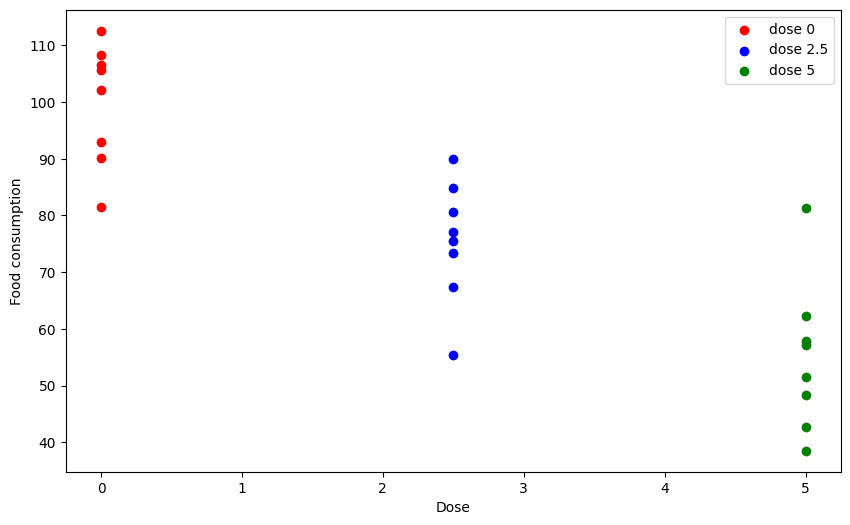

In [3]:
x0 = [0] * len(food_consump_dose0)
x2p5 = [2.5] * len(food_consump_dose2p5)
x5 = [5] * len(food_consump_dose5)

plt.scatter(x = x0, y = food_consump_dose0, color = "red", label = "dose 0")
plt.scatter(x = x2p5, y = food_consump_dose2p5, color = "blue", label = "dose 2.5")
plt.scatter(x = x5, y = food_consump_dose5, color = "green", label = "dose 5")

plt.legend()
plt.xlabel("Dose")
plt.ylabel("Food consumption")
plt.show()


In [5]:
# Prepare data for linear regression using OLS from statsmodels
data = {
    'Dose': np.concatenate([x0, x2p5, x5]),
    'FoodConsumption': np.concatenate([food_consump_dose0, food_consump_dose2p5, food_consump_dose5])
}

df = pd.DataFrame(data)
model_ols = sm.ols(formula='FoodConsumption ~ Dose', data=df).fit()
model_ols.summary()  # Print the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        FoodConsumption   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           7.27e-08
Time:                        13:27:28   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
Dose          -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

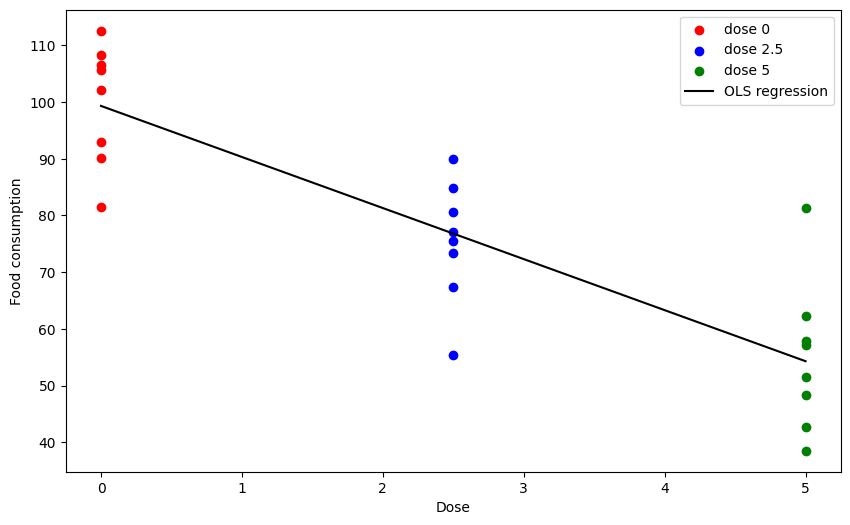

In [6]:
plt.scatter(x = x0, y = food_consump_dose0, color = "red", label = "dose 0")
plt.scatter(x = x2p5, y = food_consump_dose2p5, color = "blue", label = "dose 2.5")
plt.scatter(x = x5, y = food_consump_dose5, color = "green", label = "dose 5")
plt.plot(df["Dose"], model_ols.predict(), color = "black", label = "OLS regression")

plt.legend()
plt.xlabel("Dose")
plt.ylabel("Food consumption")
plt.show()

**Your answer goes here:**

Food Consumption = 99.3313 - 9.0075 x Dose

The R2 values of 0.739 indicates a strong linear relationship

## Activity 2: Residuals

The regression in Activity 1 is in fact valid even though the predictor $x$ only has 3 distinct values; for each fixed value of $x$, the researcher collected a random sample of $y$ values.

However, one assumption which is made by simple linear regression is that the residuals have an approximately normal distribution.

**Exercise:** Compute the residuals for the above regression and make a normal probability plot of the residuals. Do you think they are approximately normally distributed? 



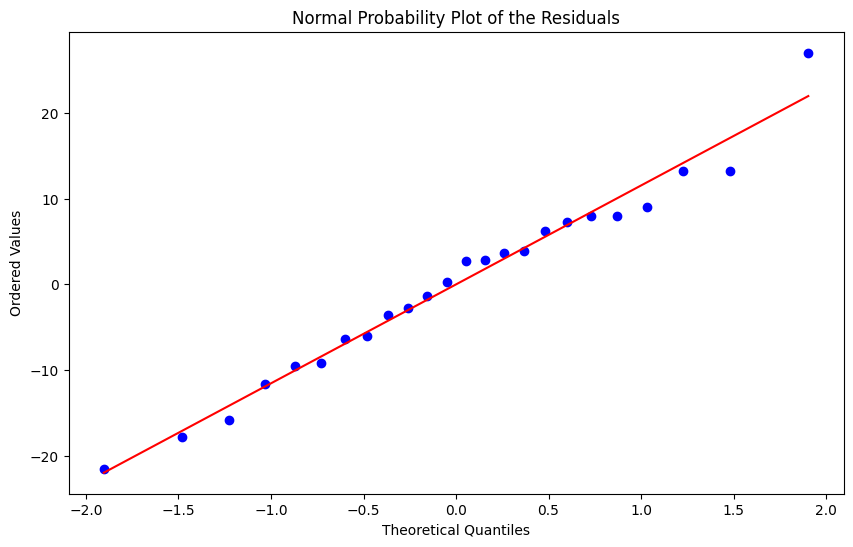

(None,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:        FoodConsumption   R-squared:                       0.739
 Model:                            OLS   Adj. R-squared:                  0.728
 Method:                 Least Squares   F-statistic:                     62.41
 Date:                Wed, 14 Feb 2024   Prob (F-statistic):           7.27e-08
 Time:                        13:29:05   Log-Likelihood:                -91.420
 No. Observations:                  24   AIC:                             186.8
 Df Residuals:                      22   BIC:                             189.2
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------------

In [9]:
import scipy.stats as stats

df['Predicted'] = model_ols.predict()
df['Residuals'] = df['FoodConsumption'] - df['Predicted']

# Normal probability plot of the residuals
stats.probplot(df['Residuals'], dist="norm", plot=plt)
plt.title('Normal Probability Plot of the Residuals')
plt.ylabel('Ordered Values')
plt.xlabel('Theoretical Quantiles')

plt.show(), model_ols.summary()

**Your answer goes here:**

The residuals are normally distributed, so we can use the OLS model.